In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Toy Dataset

In [2]:
rng = np.random.default_rng(1738)

In [3]:
num_samples = 100
noise_mean = 0
noise_std = 0.25
max_x = 5
min_x = -5

In [4]:
x = rng.uniform(min_x, max_x, num_samples)

In [5]:
f = lambda x: np.sin(x) + .25 * x

noise = rng.normal(noise_mean, noise_std, num_samples)

y = f(x) + noise

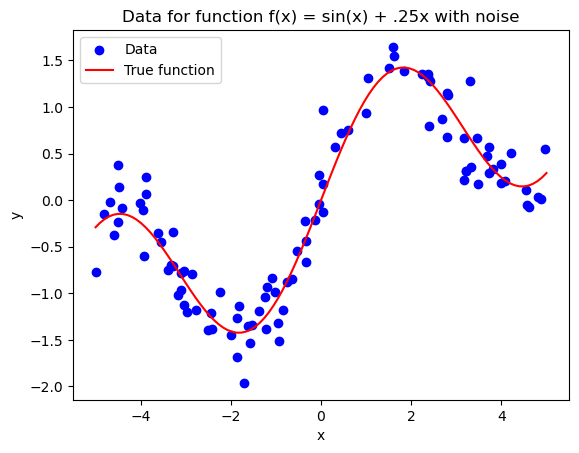

In [6]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(np.linspace(min_x, max_x, 100), f(np.linspace(min_x, max_x, 100)), 
         color='red', label='True function')
plt.title('Data for function f(x) = sin(x) + .25x with noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# KNN Regressor

In [7]:
from matplotlib.widgets import Slider, Button

In [8]:
class KNearestNeighborsRegressor:
    """
    A K-Nearest Neighbors Regressor.
    """
    def __init__(self):
        """Initialize a K-Nearest Neighbors Regressor.
        """
        self.fitted = False

        self.valid_distance_metrics = ['euclidean']
    
    def _validate_X_y(self, X: np.ndarray, y: np.ndarray):
        # check type, shape, and values of X and y
        if X is not None:
            if X.ndim != 2:
                raise ValueError('X must be 2D and of shape (num_samples, num_features)')
            if X.shape[0] == 0:
                raise ValueError('X must not be empty')
            if X.shape[1] == 0:
                raise ValueError('X must not have zero features')
            if not isinstance(X, np.ndarray):
                raise ValueError('X must be a numpy array')
            if np.any(np.isnan(X)):
                raise ValueError('X must not contain any NaN values')
            if np.any(np.isinf(X)):
                raise ValueError('X must not contain any infinite values')
            if X.shape[0] <= 1:
                raise ValueError('Decision boundary cannot be fit to fewer than 2 samples')

        if y is not None:
            if y.shape[0] == 0:
                raise ValueError('y must not be empty')
            if not isinstance(y, np.ndarray):
                raise ValueError('y must be a numpy array')
            if np.any(np.isnan(y)):
                raise ValueError('y must not contain any NaN values')
            if np.any(np.isinf(y)):
                raise ValueError('y must not contain any infinite values')
                
        if X is not None and y is not None:
            if X.shape[0] != y.shape[0]:
                raise ValueError('X and y must have the same number of samples')

    def fit(self, X: np.ndarray, y: np.ndarray):
        """Fit the model to the training data (aka just save it)

        Args:
            X (np.ndarray): feature matrix
            y (np.ndarray): target vector or matrix.
        """
        self._validate_X_y(X, y)
        self.X_train = X
        self.y_train = y
        self.fitted = True

    def __call__(self, X: np.ndarray, k: int = 3, distance_metric: str = 'euclidean'):
        """ Make predictions on new data

        Args:
            X (np.ndarray): feature matrix
            k (int, optional): size of neighborhood. Defaults to 3.
            distance_metric (str, optional): method for calculating distance from new samples to training
            samples to determine neighborhood. Defaults to 'euclidean'. Currently only supports 'euclidean'.

        Raises:
            ValueError: if model is not fitted
            ValueError: if distance_metric is not supported
            ValueError: if k is less than 1 or greater than the number of samples in the training set

        Returns:
            y_hat (np.ndarray): predicted target vector
        """
        if not self.fitted:
            raise ValueError('Model must be fit before making predictions')
        
        if not distance_metric in self.valid_distance_metrics:
            raise ValueError(f'Distance metric "{distance_metric}" not supported. Choose from {self.valid_distance_metrics}')
        
        self._validate_X_y(X, None)

        if k < 1:
            raise ValueError('k must be greater than 0')
        if k > self.X_train.shape[0]:
            raise ValueError('k must not be greater than the number of samples in the training set')

        if distance_metric == 'euclidean':

            distances = np.linalg.norm(X - np.expand_dims(self.X_train, axis=1), axis=2)

            nearest_idx = np.argsort(distances, axis=0)[:k, :]

            y_hat = self.y_train[nearest_idx].mean(axis=0)
            
        else:
            raise ValueError(f'Distance metric "{distance_metric}" not supported')

        return y_hat

In [9]:
model = KNearestNeighborsRegressor()

model.fit(x.reshape(-1, 1), y)

y_hat = model(np.linspace(min_x, max_x, 100).reshape(-1, 1), k=3)

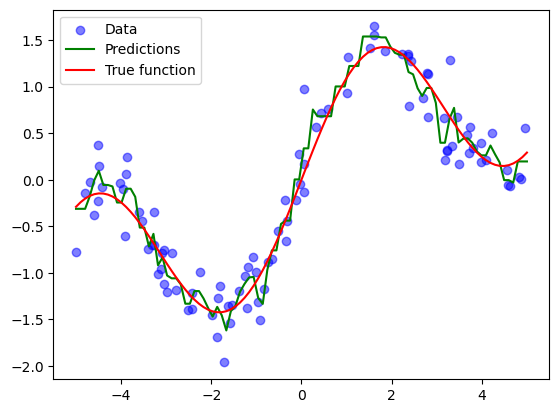

In [10]:
plt.scatter(x, y, color='blue', label='Data', alpha=0.5)
plt.plot(np.linspace(min_x, max_x, 100), y_hat, color='green', label='Predictions')
plt.plot(np.linspace(min_x, max_x, 100), f(np.linspace(min_x, max_x, 100)), 
         color='red', label='True function')
plt.legend()

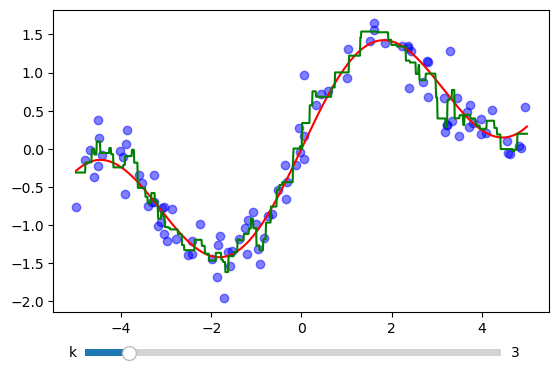

In [11]:
dummy_x = np.linspace(min_x, max_x, 1000).reshape(-1, 1)

init_k = 3

fig, ax = plt.subplots()

fig.subplots_adjust(bottom=0.25)

ax.scatter(x, y, color='blue', label='Data', alpha=0.5)
ax.plot(np.linspace(min_x, max_x, 1000), f(np.linspace(min_x, max_x, 1000)), 
         color='red', label='True function')
line, = ax.plot(np.linspace(min_x, max_x, 1000), 
                 model(dummy_x, k=init_k), color='green', label='Predictions')

ax_k = plt.axes([0.175, 0.15, 0.65, 0.03])

k_slider = Slider(ax=ax_k, label='k', valmin=1, valmax=20, valinit=init_k, valstep=1, orientation='horizontal')

def update(val):
    k = int(k_slider.val)
    line.set_ydata(model(dummy_x, k=k))
    fig.canvas.draw()

k_slider.on_changed(update)

plt.savefig('knn_regression_interactive')

plt.show()

# Kernel Smoothing Methods